<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [24]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [25]:
missing_data = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_data)

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [26]:
missing_percentage = (df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum() / len(df)) * 100
print(missing_percentage)

Employment     0.000000
JobSat        55.490013
RemoteWork    16.246160
dtype: float64


In [27]:
## Write your code here
#df['JobSat'].fillna(method='ffill',inplace=True)
df['JobSat'].fillna(df['JobSat'].mode()[0],inplace=True)

C:\Users\43667\AppData\Local\Temp\ipykernel_18196\4154179665.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(df['JobSat'].mode()[0],inplace=True)


In [28]:
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0],inplace=True)

C:\Users\43667\AppData\Local\Temp\ipykernel_18196\4192730557.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(df['RemoteWork'].mode()[0],inplace=True)


In [29]:
missing_data = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_data)

Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [49]:
 df['JobSat'].value_counts()

JobSat
8.0     43820
7.0      6379
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64

In [46]:
def clean_years_code_pro(value):
    if isinstance(value, str):
        if 'Less than 1 year' in value:
            return 0.5
        elif 'More than 50 years' in value:
            return 51
        else:
            try:
                return float(value)
            except:
                return None
    elif isinstance(value, (int, float)):
        return float(value)
    else:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_years_code_pro)


In [65]:
# Drop missing values in YearsCodePro and JobSat
df_cleaned = df[['YearsCodePro', 'JobSat']].dropna()

# Map JobSat to numerical values


# Create experience bins
bins = [0, 5, 10, 20, 100]
labels = ['0–5 yrs', '5–10 yrs', '10–20 yrs', '20+ yrs']
df_cleaned['ExperienceRange'] = pd.cut(df_cleaned['YearsCodePro'], bins=bins, labels=labels, right=False)

# Group and calculate median
mean_scores = df_cleaned.groupby('ExperienceRange')['JobSat'].mean().reset_index()


C:\Users\43667\AppData\Local\Temp\ipykernel_18196\26471817.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = df_cleaned.groupby('ExperienceRange')['JobSat'].mean().reset_index()


C:\Users\43667\AppData\Local\Temp\ipykernel_18196\1828462009.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceRange', y='JobSat', data=mean_scores, palette='Blues_d')


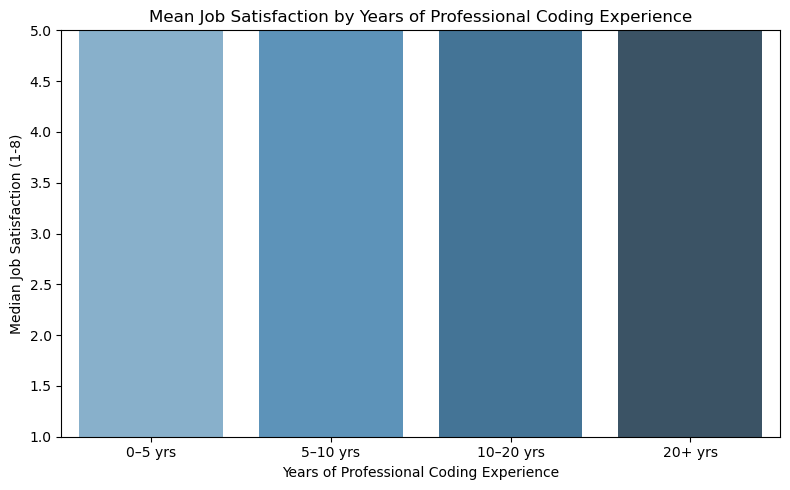

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x='ExperienceRange', y='JobSat', data=mean_scores, palette='Blues_d')

plt.title('Mean Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction (1-8)')
plt.ylim(1, 5)
plt.tight_layout()
plt.show()


C:\Users\43667\AppData\Local\Temp\ipykernel_18196\665697434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='ExperienceRange', y='JobSat', palette='Pastel1')


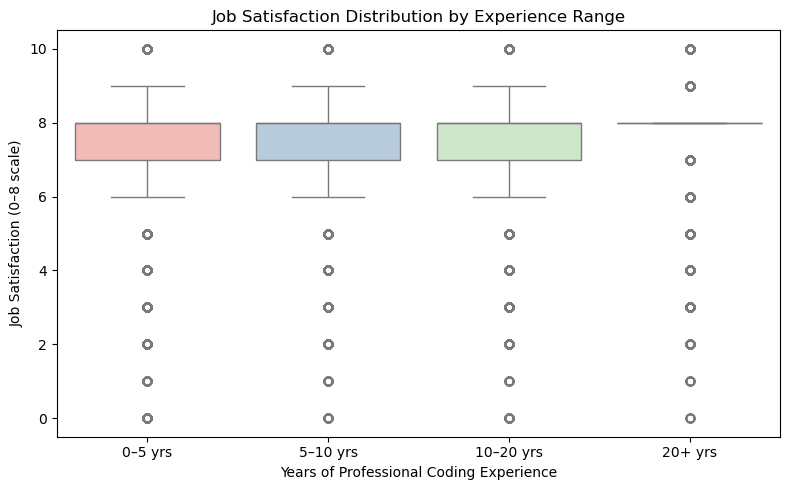

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x='ExperienceRange', y='JobSat', palette='Pastel1')

plt.title('Job Satisfaction Distribution by Experience Range')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (0–8 scale)')
plt.tight_layout()
plt.show()


In [69]:
correlation = df_cleaned['YearsCodePro'].corr(df_cleaned['JobSat'])
print(f"Correlation between YearsCodePro and JobSat: {correlation:.3f}")

Correlation between YearsCodePro and JobSat: 0.065


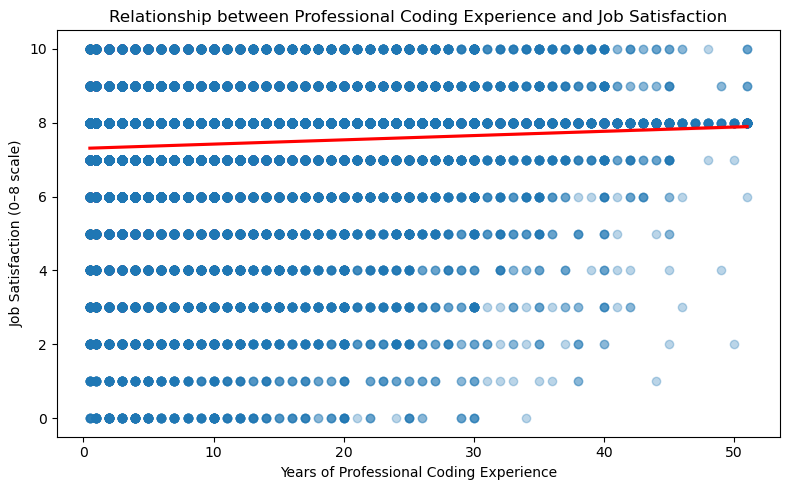

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.regplot(data=df_cleaned, x='YearsCodePro', y='JobSat', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title('Relationship between Professional Coding Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (0–8 scale)')
plt.tight_layout()
plt.show()


There's no strong linear correlation between professional coding experience and job satisfaction.

Most professionals, regardless of experience, report high satisfaction.

Other factors (job role, company culture, compensation, work-life balance) likely play a larger role.

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


C:\Users\43667\AppData\Local\Temp\ipykernel_18196\3269997909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='Set2')


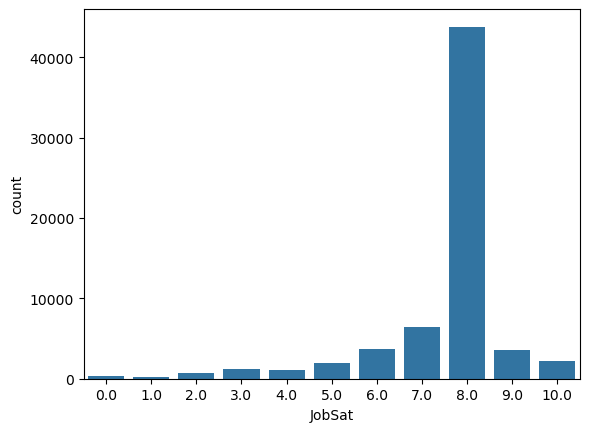

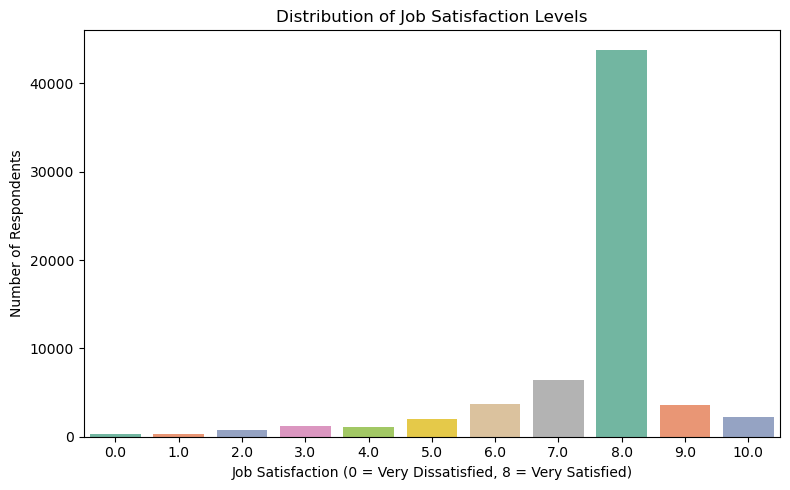

In [71]:
## Write your code here
sns.countplot(data=df,x='JobSat')
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat', palette='Set2')

plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction (0 = Very Dissatisfied, 8 = Very Satisfied)')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


C:\Users\43667\AppData\Local\Temp\ipykernel_18196\2282185278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='RemoteWork',palette='Set2')


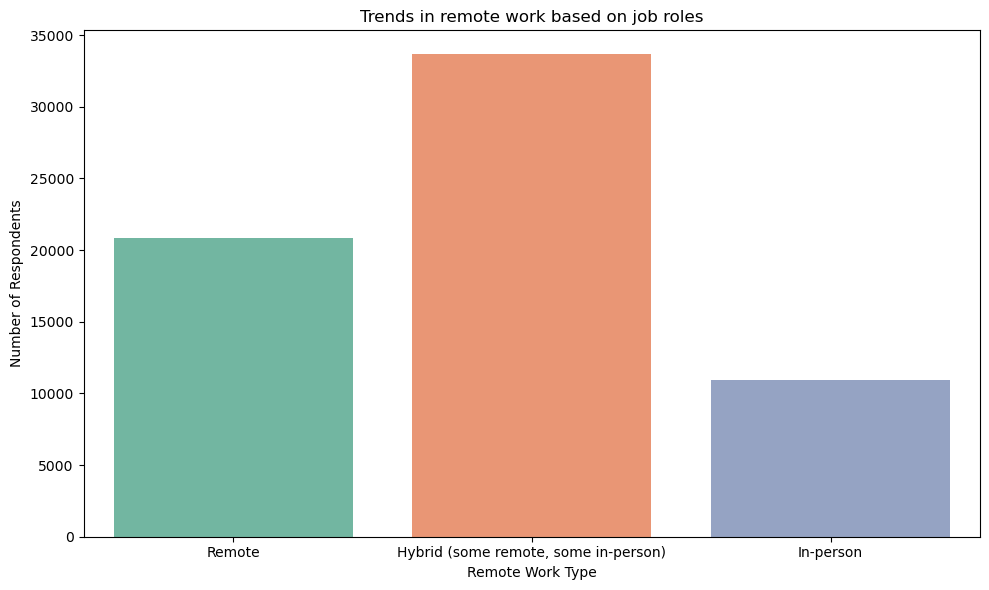

In [72]:
## Write your code here
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='RemoteWork',palette='Set2')

plt.title('Trends in remote work based on job roles')
plt.xlabel('Remote Work Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [75]:
#This shows what percentage of each employment type prefers remote/hybrid/onsite work.
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100
print(remote_by_employment.round(1))


RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                 44.3   
Employed, full-time;Employed, part-time                                             40.1   
Employed, full-time;Independent contractor, fre...                                  37.4   
Employed, full-time;Independent contractor, fre...                                  43.5   
Employed, full-time;Independent contractor, fre...                                   0.0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                  57.1   
Student, full-time;Student, part-time;Retired                                      100.0   
Student, part-time                                                              

Full-time employees:

~44% hybrid

~34% remote

~22% in-person
🔹 Hybrid is slightly preferred.

Students (part-time/full-time):

Some groups show 100% hybrid, others 0% remote
🔹 Possibly driven by campus requirements.

Mixed employment types (e.g., “Full-time + Contractor”):

Varying preferences, with some rows showing >50% remote
🔹 Suggests mixed roles lead to more remote flexibility.



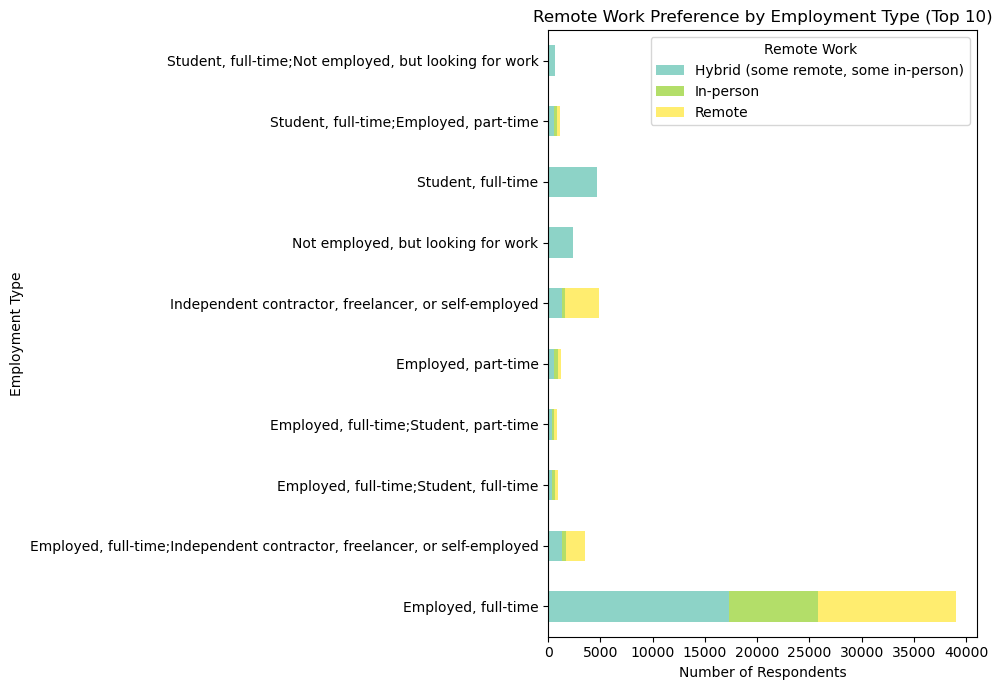

In [90]:
# Step 1: Get top 10 most frequent employment types
top_employments = df['Employment'].value_counts().head(10).index
df_top = df[df['Employment'].isin(top_employments)]

# Step 2: Create cross-tab and plot
cross_tab = pd.crosstab(df_top['Employment'], df_top['RemoteWork'])

# Step 3: Plot
cross_tab.plot(kind='barh', stacked=True, figsize=(10, 7), colormap='Set3')

plt.title('Remote Work Preference by Employment Type (Top 10)')
plt.xlabel('Number of Respondents')
plt.ylabel('Employment Type')
plt.legend(title='Remote Work')
plt.tight_layout()
plt.show()


Most full-time employees prefer hybrid work.

Contractor/freelancer combinations skew more remote.

Students have less consistent patterns, possibly due to academic obligations.

Employment type strongly influences remote flexibility that is a valuable insight for workforce planning or survey analysis.

In [84]:
df['DevType'].isnull().sum()

0

In [83]:
df['DevType'].fillna(df['DevType'].mode()[0],inplace=True)

C:\Users\43667\AppData\Local\Temp\ipykernel_18196\3426644177.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DevType'].fillna(df['DevType'].mode()[0],inplace=True)


In [85]:
remote_by_DevType= pd.crosstab(df['DevType'], df['RemoteWork'], normalize='index') * 100
print(remote_by_DevType.round(1))

RemoteWork                                     Hybrid (some remote, some in-person)  \
DevType                                                                               
Academic researcher                                                            65.7   
Blockchain                                                                     28.5   
Cloud infrastructure engineer                                                  47.3   
Data engineer                                                                  50.4   
Data or business analyst                                                       53.0   
Data scientist or machine learning specialist                                  57.2   
Database administrator                                                         45.6   
Designer                                                                       55.5   
DevOps specialist                                                              53.9   
Developer Advocate                         

# Remote-first roles: 
Blockchain, Developer Advocate, QA, Cloud roles.

#  Hybrid-heavy roles:
Data Science, Research, Education.

# On-site biased: 
Hardware engineers, educators.

# Balanced mix: 
Full-stack devs, product/project managers.

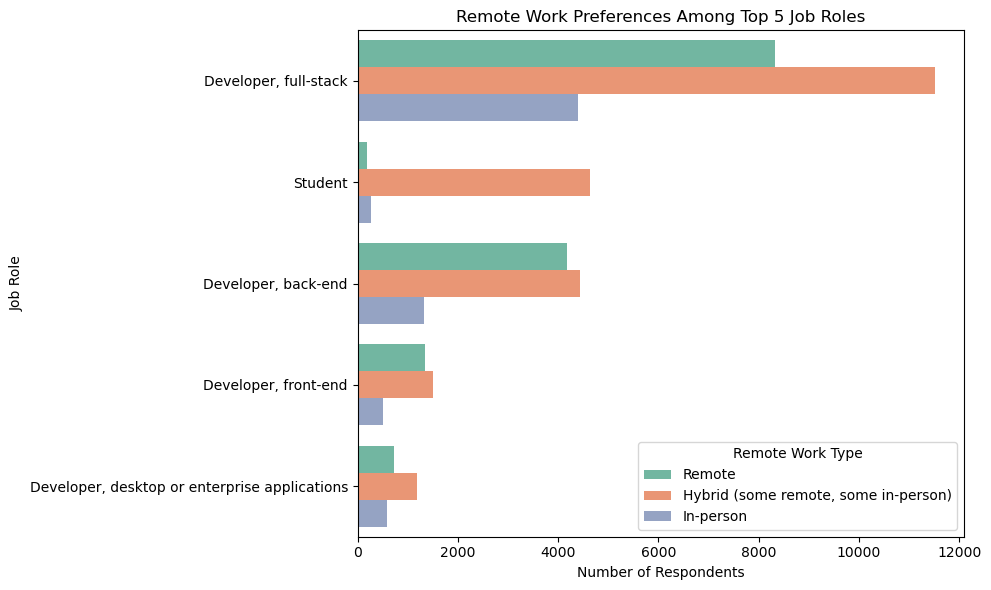

In [87]:
top_roles = df['DevType'].value_counts().head(5).index
df_top_roles = df[df['DevType'].isin(top_roles)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_roles, y='DevType', hue='RemoteWork', palette='Set2')
plt.title('Remote Work Preferences Among Top 5 Job Roles')
plt.xlabel('Number of Respondents')
plt.ylabel('Job Role')
plt.legend(title='Remote Work Type')
plt.tight_layout()
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [98]:
df['LanguageHaveWorkedWith'].isnull().sum()
#df['LanguageHaveWorkedWith'].fillna(df['LanguageHaveWorkedWith'].mode()[0],inplace=True)

0

In [101]:
# Step 1: Split languages per row
df_languages = df[['Country', 'LanguageHaveWorkedWith']].dropna()
df_languages['LanguageHaveWorkedWith'] = df_languages['LanguageHaveWorkedWith'].str.split(';')

# Step 2: Explode into individual rows
df_exploded = df_languages.explode('LanguageHaveWorkedWith')
df_exploded.rename(columns={'LanguageHaveWorkedWith': 'Language'}, inplace=True)

# Optional: Standardize region names (optional based on your dataset)
# df_exploded['Country'] = df_exploded['Country'].replace(...)

# Step 3: Count frequency per region
lang_region_counts = df_exploded.groupby(['Country', 'Language']).size().reset_index(name='Count')


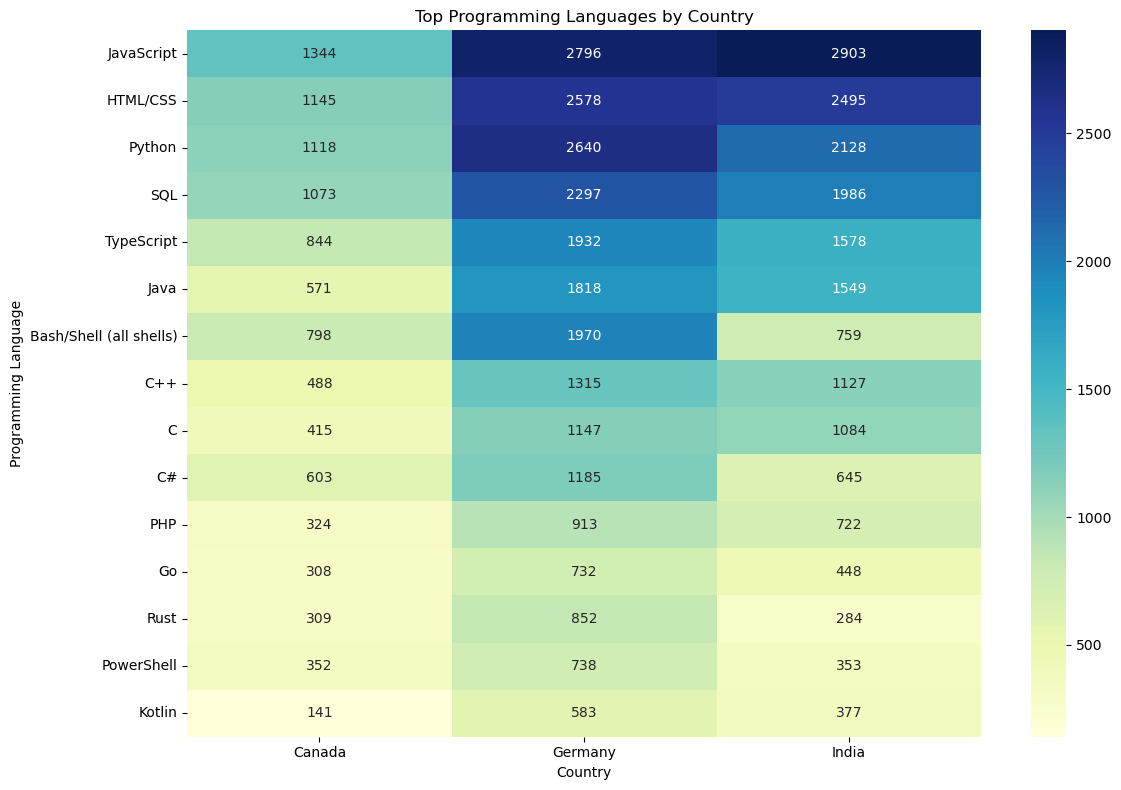

In [102]:
# Filter to selected countries
top_countries = ['United States', 'India', 'Germany', 'United Kingdom', 'Canada']
filtered = lang_region_counts[lang_region_counts['Country'].isin(top_countries)]

# Pivot to make a heatmap
heatmap_data = filtered.pivot(index='Language', columns='Country', values='Count').fillna(0)

# Keep only top N languages
top_languages = heatmap_data.sum(axis=1).sort_values(ascending=False).head(15).index
heatmap_data = heatmap_data.loc[top_languages]

# Plot heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Top Programming Languages by Country")
plt.ylabel("Programming Language")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


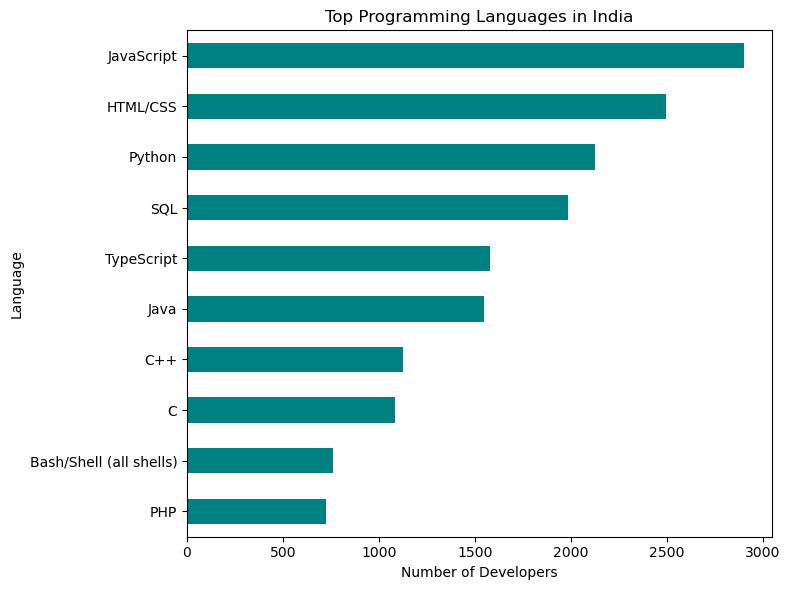

In [103]:
# Filter for one country, e.g., India
india_langs = df_exploded[df_exploded['Country'] == 'India']['Language'].value_counts().head(10)

# Bar plot
india_langs.plot(kind='barh', color='teal', figsize=(8, 6))
plt.title('Top Programming Languages in India')
plt.xlabel('Number of Developers')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


at 1st clean and find the missing values and impute these values with forward fill method

In [113]:
## Write your code here
correlation = df['YearsCodePro'].corr(df['JobSatPoints_1'])
print(f"Correlation between YearsCodePro and JobSatPoints_1: {correlation:.3f}")

Correlation between YearsCodePro and JobSatPoints_1: -0.010


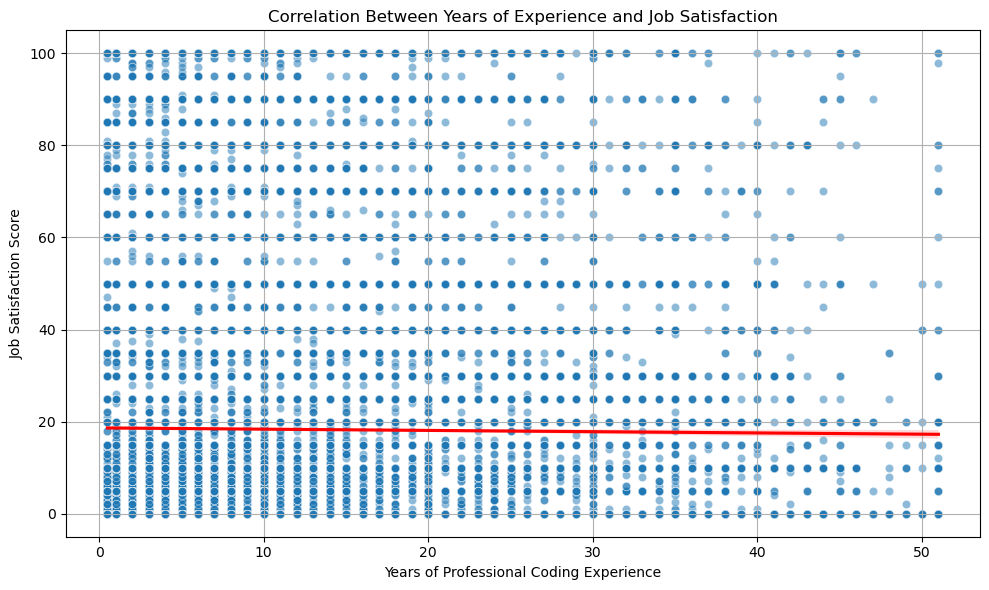

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
sns.regplot(data=df, x='YearsCodePro', y='JobSatPoints_1', scatter=False, color='red')

plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [120]:
df['EdLevel'].isnull().sum()

0

In [121]:
## Write your code here
EdLevel_by_employement= pd.crosstab(df['EdLevel'], df['Employment'], normalize='index') * 100
print(EdLevel_by_employement.round(1))

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                58.7   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                       66.3   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    69.7   
Primary/elementary school                                          16.4   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     68.5   
Secondary school (e.g. American high school, Ge...                 27.2   
Some college/university study without earning a...                 47.2   
Something else                                                     41.8   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

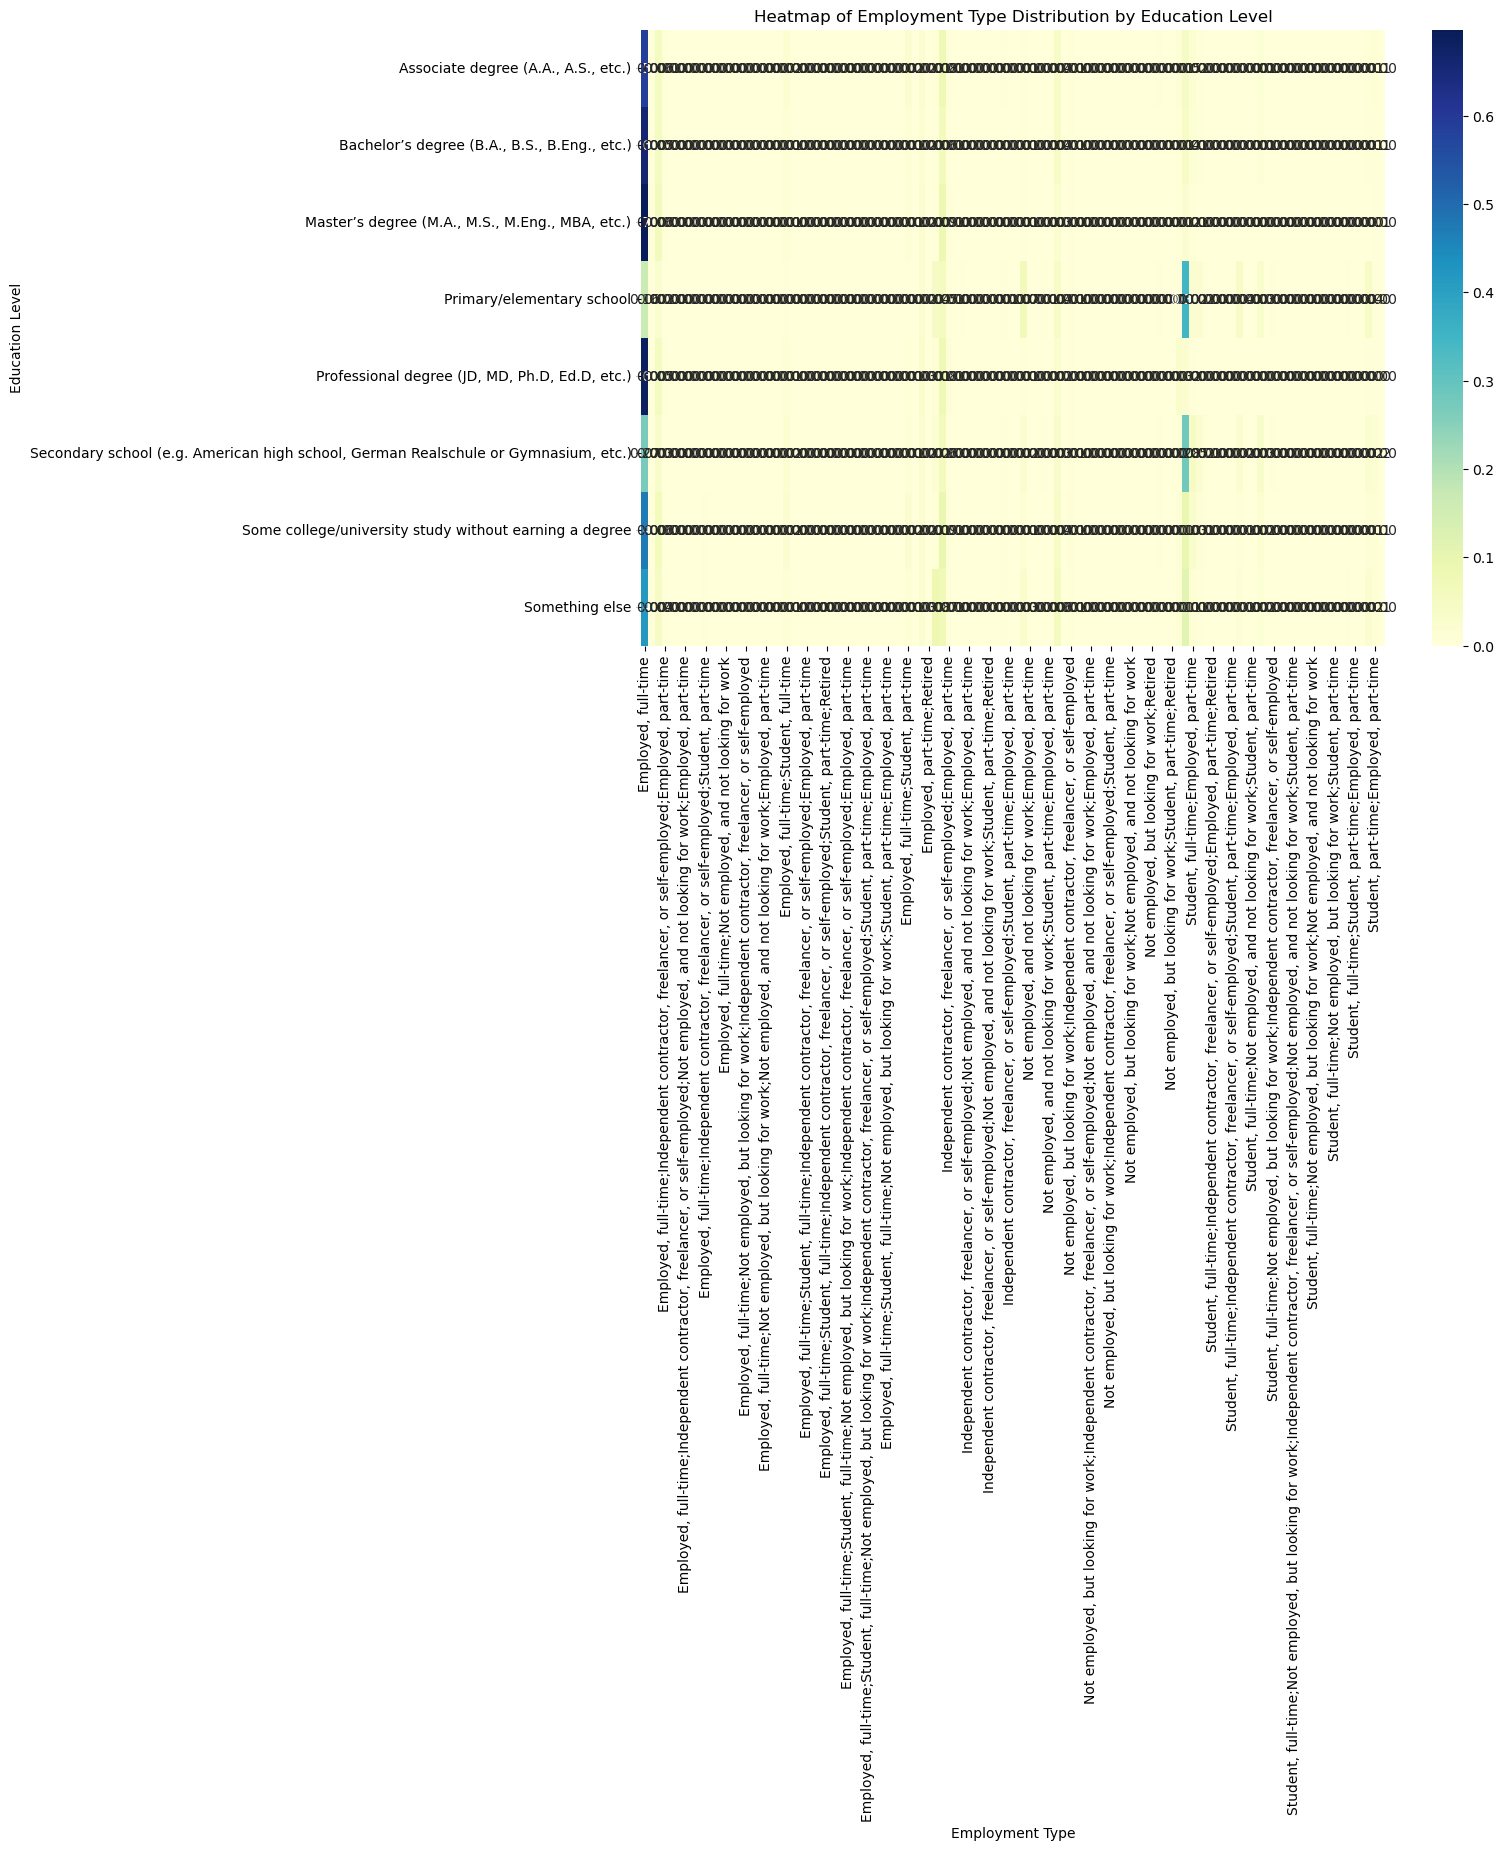

In [123]:
import seaborn as sns

# Use the same normalized crosstab without margins for heatmap
heatmap_data = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index')

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')

plt.title('Heatmap of Employment Type Distribution by Education Level')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.show()


In [124]:
from scipy.stats import chi2_contingency

# Create contingency table without normalization
contingency_table = pd.crosstab(df['EdLevel'], df['Employment'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("There is a significant association between education level and employment type.")
else:
    print("No significant association found between education level and employment type.")


Chi-square statistic: 15807.33
P-value: 0.0000
There is a significant association between education level and employment type.


Education level and employment type are not independent — your data suggests that different education levels tend to have different patterns of employment.

For example, people with higher education might be more likely to be employed full-time or in certain job types, while those with lower education may have more part-time or contract roles.

The cross-tab and visualization will show how the proportions differ, helping you interpret specific trends.

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [125]:
## Write your code here
df.to_csv('D:\My folder\ostad\coursera\Ibm-data-analyst-capstone-project\cleaned_analyzed_dataset.csv', index=False)

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\43667\AppData\Local\Temp\ipykernel_18196\402180433.py:2: SyntaxWarning: invalid escape sequence '\M'
  df.to_csv('D:\My folder\ostad\coursera\Ibm-data-analyst-capstone-project\cleaned_analyzed_dataset.csv', index=False)


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
